In [13]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

## CARGAR IMAGENES

In [14]:
#para leer una imagen 
image_path = "./data/cctv_image.jpg"
image = cv2.imread(image_path)

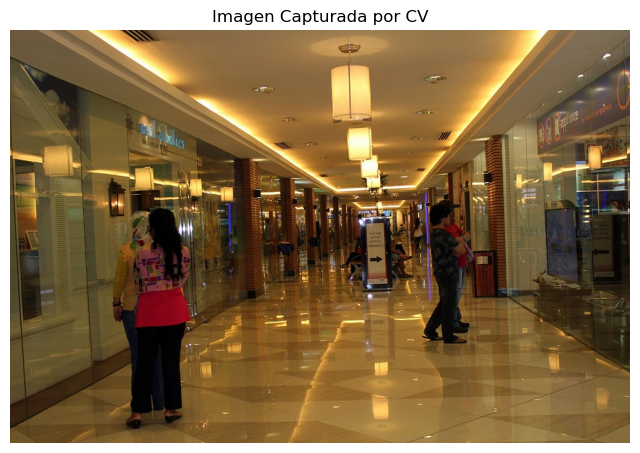

In [15]:
# Verificar si la imagen se cargó correctamente
if image is None:
    print("Error: No se pudo cargar la imagen. Verifica la ruta.")
else:
    # Convertir la imagen de BGR (formato OpenCV) a RGB (formato matplotlib)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Mostrar la imagen usando matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.title("Imagen Capturada por CV")
    plt.axis("off")
    plt.show()

### Captura y visualización de video en tiempo real

In [16]:
# Abrir la cámara web (0) es la webcam por defecto
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: No se pudo abrir la cámara.")
else:
    while True:
        # Capturar frame por frame
        ret, frame = cap.read()
        if not ret:
            print("Error: No se pudo leer el frame.")
            break

        # Mostrar el frame en una ventana llamada 'Frame de CCTV'
        cv2.imshow("Frame de CV", frame)

        # Esperar 1 ms para detectar si se ha presionado la tecla 'q' para salir
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Liberar el objeto de captura y cerrar todas las ventanas
    cap.release()
    cv2.destroyAllWindows()

### cargar un video

In [17]:
# Path video
path_video = "./video/store-aisle-detection.mp4"

# Cargar video
cap = cv2.VideoCapture(path_video)

if not cap.isOpened():
    print("Error: No se pudo abrir la cámara.")
else:
    while True:
        # Capturar frame por frame
        ret, frame = cap.read()
        if not ret:
            print("Error: No se pudo leer el frame.")
            break

        # Mostrar el frame en una ventana llamada 'Frame de CCTV'
        cv2.imshow("Frame de CV", frame)

        # Esperar 1 ms para detectar si se ha presionado la tecla 'q' para salir
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Liberar el objeto de captura y cerrar todas las ventanas
    cap.release()
    cv2.destroyAllWindows()

### Mejora, Corrección y Anotación de Imágenes

#### Brillo

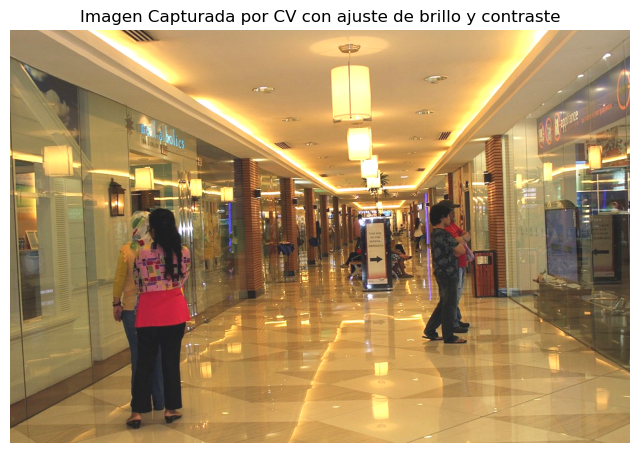

In [18]:
# Cargar la imagen
image_path = "./data/cctv_image.jpg"
image = cv2.imread(image_path)
if image is None:
    print("Error: No se pudo cargar la imagen.")
    exit()

# Ajuste de brillo y contraste: new_image = image * alpha + beta
alpha = 1.2  # Factor de contraste (mayor a 1 aumenta contraste)
beta = 30    # Valor de brillo (positivo aumenta el brillo)
adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Convertir la imagen de BGR (formato OpenCV) a RGB (formato matplotlib)
adjusted = cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB)

# Mostrar la imagen usando matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(adjusted)
plt.title("Imagen Capturada por CV con ajuste de brillo y contraste")
plt.axis("off")
plt.show()

In [19]:
# Convertir la imagen de BGR (formato OpenCV) a RGB (formato matplotlib)
adjusted = cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB)

# Guardar imagen para comparar
output_file = "./data/cctv_image_con_correcciones.jpg"
cv2.imwrite(output_file, adjusted)

True

#### Color y Normalización 
El espacio de color HSV (Hue, Saturation, Value) representa los colores según su matiz, saturación y valor.
Convertir una imagen a HSV facilita la manipulación de la saturación, permitiendo ajustar la intensidad o pureza de los colores sin afectar el brillo o el tono.

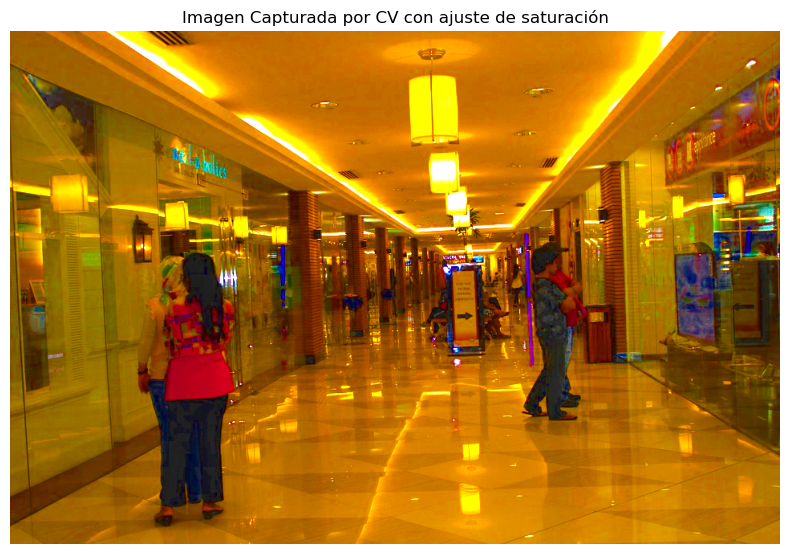

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convertir la imagen ajustada a espacio HSV para modificar la saturación
hsv = cv2.cvtColor(adjusted, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(hsv)

# Aumentar la saturación
saturacion = 5
s = cv2.multiply(s, saturacion)  
s = np.clip(s, 0, 255).astype(np.uint8)

# Recombinar canales HSV y convertir de nuevo a BGR
hsv_adjusted = cv2.merge([h, s, v])
color_corrected = cv2.cvtColor(hsv_adjusted, cv2.COLOR_HSV2BGR)

# Convertir de BGR a RGB para mostrar correctamente con matplotlib
color_corrected_rgb = cv2.cvtColor(color_corrected, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.figure(figsize=(8, 6))
plt.imshow(color_corrected_rgb)
plt.title("Imagen Capturada por CV con ajuste de saturación")
plt.axis("off")
plt.tight_layout()
plt.show()


In [21]:
# Convertir la imagen de BGR (formato OpenCV) a RGB (formato matplotlib)
color_corrected_RGB = cv2.cvtColor(color_corrected, cv2.COLOR_BGR2RGB)

# Guardar imagen para comparar
output_file = "./data/cctv_image_con_ajuste_saturacion.jpg"
cv2.imwrite(output_file, color_corrected_RGB)

True

#### Anotaciones (cuadrados y demás)

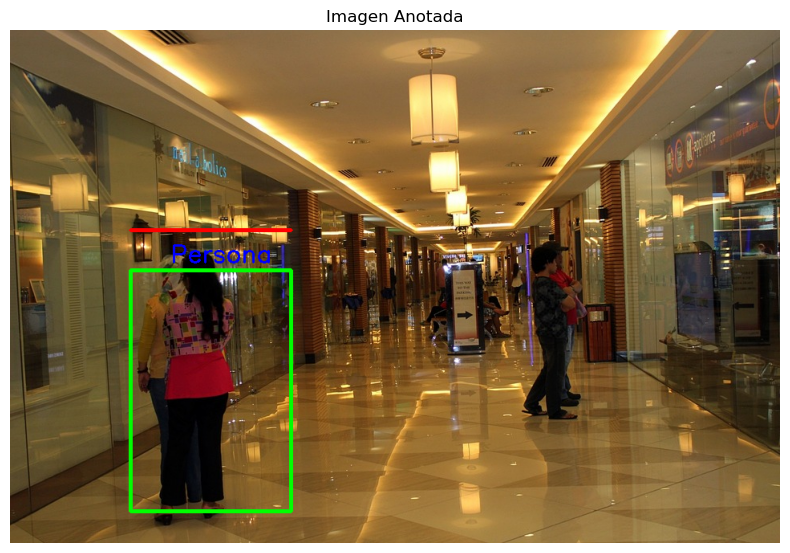

In [22]:
import cv2
import matplotlib.pyplot as plt

# Hacer una copia de una imagen ya cargada
annotated = image.copy()

# Dibujar una línea: desde (150,250) hasta (350,250) en rojo BGR: (0, 0, 255) con grosor de línea 3 píxeles
cv2.line(annotated, (150, 250), (350, 250), (0, 0, 255), 3)

# Dibujar un rectángulo: esquina superior izquierda (150, 300), inferior derecha (350,600) en verde BGR: (0, 255, 0)
cv2.rectangle(annotated, (150, 300), (350, 600), (0, 255, 0), 3)

# Escribir texto: 'Persona' en azul BGR: (255, 0, 0), ubicado en (200,290)
cv2.putText(annotated, 'Persona', (200, 290), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# Convertir de BGR a RGB para visualizar correctamente con matplotlib
annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.figure(figsize=(8, 6))
plt.imshow(annotated_rgb)
plt.title("Imagen Anotada")
plt.axis("off")
plt.tight_layout()
plt.show()


#### Compatariva de ajustes (Total)

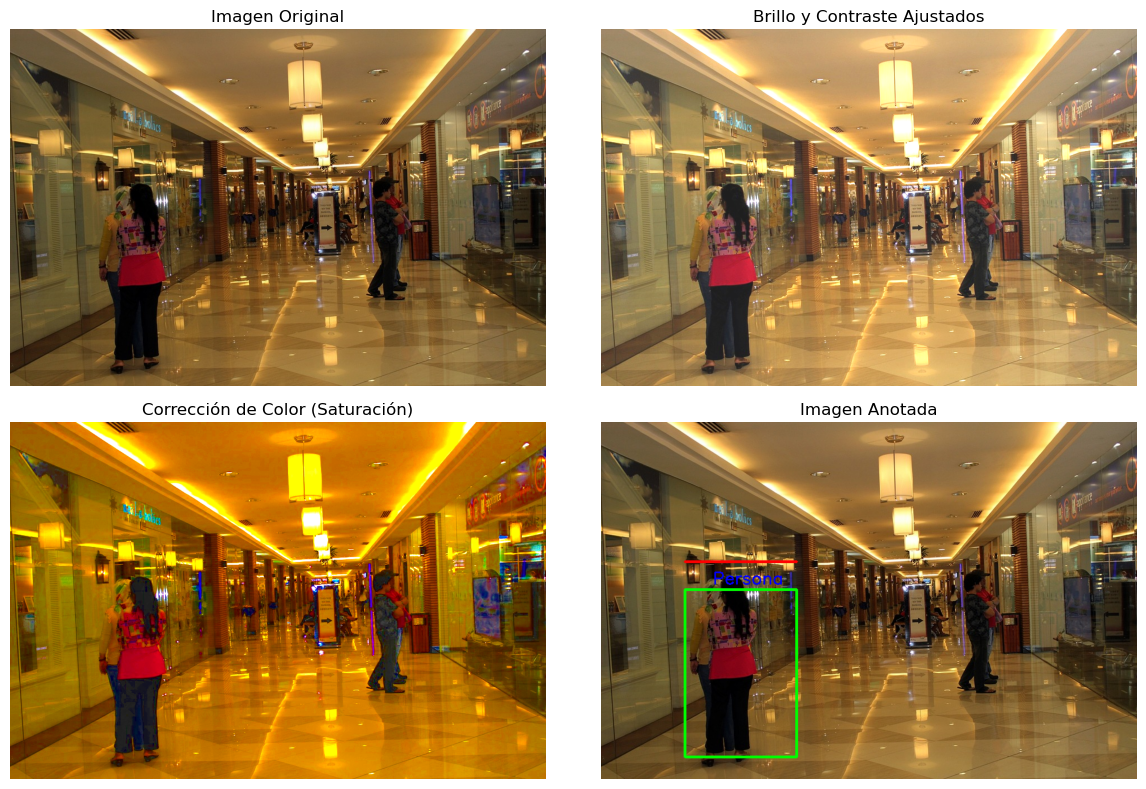

In [23]:
# Convertir de BGR a RGB para visualizar con matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
adjusted_rgb = cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB)
color_corrected_rgb = cv2.cvtColor(color_corrected, cv2.COLOR_BGR2RGB)
annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(adjusted_rgb)
plt.title("Brillo y Contraste Ajustados")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(color_corrected_rgb)
plt.title("Corrección de Color (Saturación)")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(annotated_rgb)
plt.title("Imagen Anotada")
plt.axis("off")

plt.tight_layout()
plt.show()
